This file aims to identify when a "wrong" 2pi jump occurs.

In [1]:
# . Honours Module Folder
# ├ FYPLibrary
# | ├ file_reading.py
# | └ IQ_demod.py
# └ Sub Project folder i.e.: os.path.abspath('')
#   └ This Jupyter notebook(.ipynb)

# Initialization: Directory appending for my system. Vary the directories as necessary.
import sys
import os.path as path
# Add the FYPLibrary folder in the parent level of this folder.
if path.join(path.dirname(path.abspath('')), 'FYPLibrary') not in sys.path:
    sys.path.append(path.join(path.dirname(path.abspath('')), 'FYPLibrary'))

# from pprint import pprint
# pprint(sys.path)

# within this jupyter notebook
from os import listdir
from file_reading import *
import matplotlib.pyplot as plt
from math import pi

In [2]:
# updating of library
from IQ_demod import *

In [3]:
# Yield all files in batch folder
folderpath = path.join(path.abspath(''),'traces')
for i, f in enumerate(files:= listdir(path= folderpath)):
    print(f"{i:>3}: {f}")


  0: C1-004Hz-020.2mVpp-80.125000MHz-OneAmp00002.txt
  1: C1-004Hz-020.4mVpp-80.125000MHz-OneAmp00001.txt
  2: C1-122Hz-020mVpp-80.125000MHz-OneAmp00001.txt
  3: C2-000Hz-000mVpp-80.1250448MHz00004.txt
  4: C2-000Hz-000mVpp-80.1250448MHz00005.txt
  5: C2-ball-drop-00002.txt


In [4]:
# my_input = int(input("Please specify which file you would like to generate a periodogram of: "))
my_input = 1
NAME = files[my_input]
TXT_FILE_PATH = file_str_to_path(NAME, dir=folderpath)
print(f"{TXT_FILE_PATH = }")
# _, mirror_f, mVpp, delta_corr = numerical_variables_from_name(NAME)
# print(f"{mirror_f = }, {mVpp = }, {delta_corr = }")

TXT_FILE_PATH = 'd:\\NUS\\Semester 7\\PC4199 Honours Project\\20211215 phase reconstruction experimental\\traces\\C1-004Hz-020.4mVpp-80.125000MHz-OneAmp00001.txt'


In [5]:
zoom_in_start = 0
zoom_in_end = zoom_in_start + 5000000

N = 4
[Notice] Ignore the following mixed types warning.


C:\Users\Thormund\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3377: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


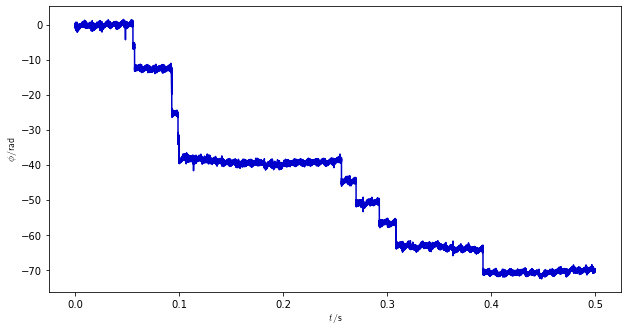

In [6]:
# most setups
# SIGNAL_F = 80.0125e6*2 #Hz 
# SAMPLING_F = 1.0e6 #Hz

# ball drop #
SIGNAL_F = 80.0125e6 *2
SAMPLING_F = 1e5
N, _ = freq_ratio(signal= SIGNAL_F, sample= SAMPLING_F)

print(f"{N = }")

meta, trace = parse_and_read_oscilliscope_txt(TXT_FILE_PATH)
signal = signal_from_trace(np.asarray(trace))
phases = signal_to_phase(signal, N, 2*pi/N, True)
phases = phase_reconstruction(phases, 4.8)
t_axis = np.arange(start= 0, 
    stop= (int(meta["Record Length"][0])-N) * meta['Sample Interval'][0],
    step= meta['Sample Interval'][0])[zoom_in_start:zoom_in_end]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t_axis, phases[zoom_in_start:zoom_in_end], color = 'mediumblue')
ax.set_ylabel(r'$\phi$/rad', useTex = True)
ax.set_xlabel(r'$t$/s', useTex = True)
fig.set_size_inches(11.75-1.5, 8.25-2 - 1)


In [7]:
# note that signal in this interval is
print(f"{len(signal) = }")
print(f"{len(phases) = }")
# signal[zoom_in_start+N:zoom_in_end+N]

len(signal) = 500002
len(phases) = 499998


Modified attempt by determining cumulated dphi.
First without any reconstruction

In [8]:
# # signal = ... # prev cell
# phases = signal_to_phase(signal, N, 2*pi/N, phase_advancement_correction= False)
# t_axis = np.arange(start= 0, 
#     stop= (int(meta["Record Length"][0])-N) * meta['Sample Interval'][0],
#     step= meta['Sample Interval'][0])

# fig, ax = plt.subplots(nrows=1, ncols=1)
# ax.plot(t_axis[zoom_in_start:zoom_in_end], phases[zoom_in_start:zoom_in_end], color = 'mediumblue')
# ax.set_ylabel(r'$\phi$/rad', useTex = True)
# ax.set_xlabel(r'$t$/s', useTex = True)

by reconstruction now
formally, arctan2: R x R -> [-pi, pi], but it is safe to think of as [0, 2pi]

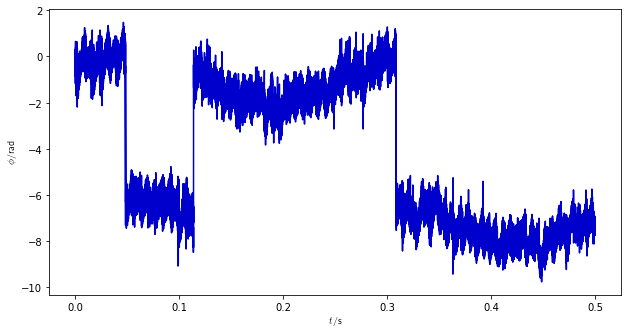

In [9]:
# signal = ... # prev cell
phases = signal_to_phase(signal, N, 2*pi/N, phase_advancement_correction= False)
t_axis = np.arange(start= 0, 
    stop= (int(meta["Record Length"][0])-N) * meta['Sample Interval'][0],
    step= meta['Sample Interval'][0])

# dphi = 2*pi/N
# results = []
# for i, p in enumerate(phases):
#     if i != 0:
#         expected_phase = phases[i-1] + dphi
#         # choose between the least difference (especially when expected phase > 2pi)
#         case1 = p- expected_phase # no need to +2pi to anything
#         # case2 = (p+ 2*pi) - expected_phase
#         case2 = case1 + 2*pi
#         delta = case1 if abs(case1) < abs(case2) else case2
#         # if i > zoom_in_start and i < zoom_in_end:
#         #     print(f"{i = }, {case1 = }, {case2 = }, {delta = }")
#         results.append(results[-1]+delta)
#     else:
#         results.append(p)
    
phases = phase_reconstruction_2(phases, 2*pi/N)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t_axis[zoom_in_start:zoom_in_end], phases[zoom_in_start:zoom_in_end], color = 'mediumblue')
ax.set_ylabel(r'$\phi$/rad', useTex = True)
ax.set_xlabel(r'$t$/s', useTex = True)
fig.set_size_inches(11.75-1.5, 8.25-2 - 1)

determining the freq of deltas

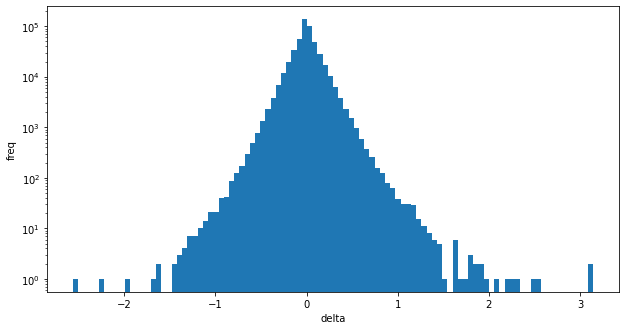

In [10]:
# signal = ... # prev cell
phases = signal_to_phase(signal, N, 2*pi/N, phase_advancement_correction= False)
deltas = phase_reconstruction_2(phases, 2*pi/N, get_deltas= True)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(deltas, bins= 100)
ax.set_yscale('log')
ax.set_ylabel(r'freq', useTex = False)
ax.set_xlabel(r'delta', useTex = False)
fig.set_size_inches(11.75-1.5, 8.25-2 - 1)

implementation of jy's gradient suggestion

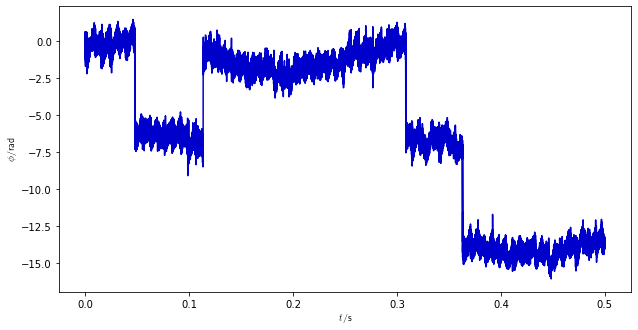

In [11]:
# signal = ... # prev cell
phases = signal_to_phase(signal, N, 2*pi/N, phase_advancement_correction= False)
t_axis = np.arange(start= 0, 
    stop= (int(meta["Record Length"][0])-N) * meta['Sample Interval'][0],
    step= meta['Sample Interval'][0])

# phases = phase_reconstruction_3(phases, 2*pi/N, grad_tolerance=0.21, \
#     twoPi_tolerance= [2.2, 1.9], step_size_tol= [2,6], debug= (False, 113695, 113710))

phases = phase_reconstruction_3(phases, 2*pi/N, grad_tolerance=0.78, \
    twoPi_tolerance= [2.0, 1.0], step_size_tol= [3,8], debug= (False, 113695, 113710))

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t_axis[zoom_in_start:zoom_in_end], phases[zoom_in_start:zoom_in_end], color = 'mediumblue')
ax.set_ylabel(r'$\phi$/rad', useTex = True)
ax.set_xlabel(r'$t$/s', useTex = True)
fig.set_size_inches(11.75-1.5, 8.25-2 - 1)

Text(0.5, 0, '$t$/s')

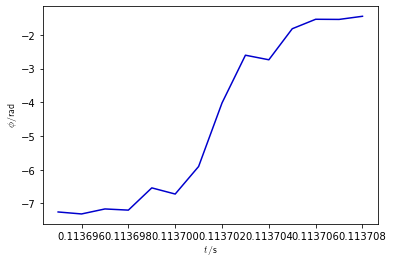

In [12]:
zoom_in_start2 = 113695
zoom_in_end2 = zoom_in_start2 + 14

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t_axis[zoom_in_start2:zoom_in_end2], phases[zoom_in_start2:zoom_in_end2], color = 'mediumblue')
ax.set_ylabel(r'$\phi$/rad', useTex = True)
ax.set_xlabel(r'$t$/s', useTex = True)